# DBSCAN Clustering:
DBSCAN, a clustering algorithm based on density, operates under the principle that clusters consist of areas in space with high density, which are delineated by spaces of lower density. It aggregates data points that are closely packed together into a single cluster.

## About this dataset
The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

Alcohol
Malic acid
Ash
Alcalinity of ash
Magnesium
Total phenols
Flavanoids
Nonflavanoid phenols
Proanthocyanins
Color intensity
Hue
OD280/OD315 of diluted wines
Proline

## Step 1: Install PyCaret

In [11]:
!pip install pycaret[full]


## Step 2: Import Necessary Libraries

In [2]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



## Step 3: Load the Dataset


In [3]:
# Assuming you've uploaded the file to Google Colab
data = pd.read_csv('/content/wine-clustering.csv')

## Step 4: Apply DBSCAN Clustering

In [4]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster'] = dbscan.fit_predict(data)


## Step 5: Visualize the Clusters with PCA

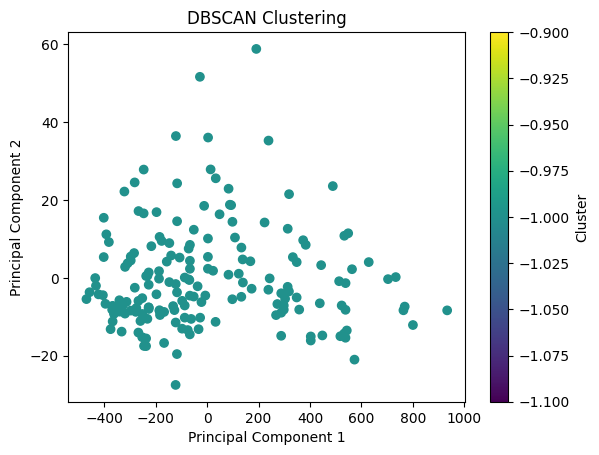

In [5]:
# Reduce the data to two principal components for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


## 5.1 Heatmap
A heatmap can visualize the correlation or density of features in your dataset.



In [7]:
for eps in [0.5, 1, 1.5, 2]:
    for min_samples in [5, 10, 15]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(data)

        # Count clusters and noise
        cluster_count = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        noise_count = list(cluster_labels).count(-1)

        print(f'eps: {eps}, min_samples: {min_samples} -> Clusters: {cluster_count}, Noise Points: {noise_count}')


eps: 0.5, min_samples: 5 -> Clusters: 0, Noise Points: 178
eps: 0.5, min_samples: 10 -> Clusters: 0, Noise Points: 178
eps: 0.5, min_samples: 15 -> Clusters: 0, Noise Points: 178
eps: 1, min_samples: 5 -> Clusters: 0, Noise Points: 178
eps: 1, min_samples: 10 -> Clusters: 0, Noise Points: 178
eps: 1, min_samples: 15 -> Clusters: 0, Noise Points: 178
eps: 1.5, min_samples: 5 -> Clusters: 0, Noise Points: 178
eps: 1.5, min_samples: 10 -> Clusters: 0, Noise Points: 178
eps: 1.5, min_samples: 15 -> Clusters: 0, Noise Points: 178
eps: 2, min_samples: 5 -> Clusters: 0, Noise Points: 178
eps: 2, min_samples: 10 -> Clusters: 0, Noise Points: 178
eps: 2, min_samples: 15 -> Clusters: 0, Noise Points: 178


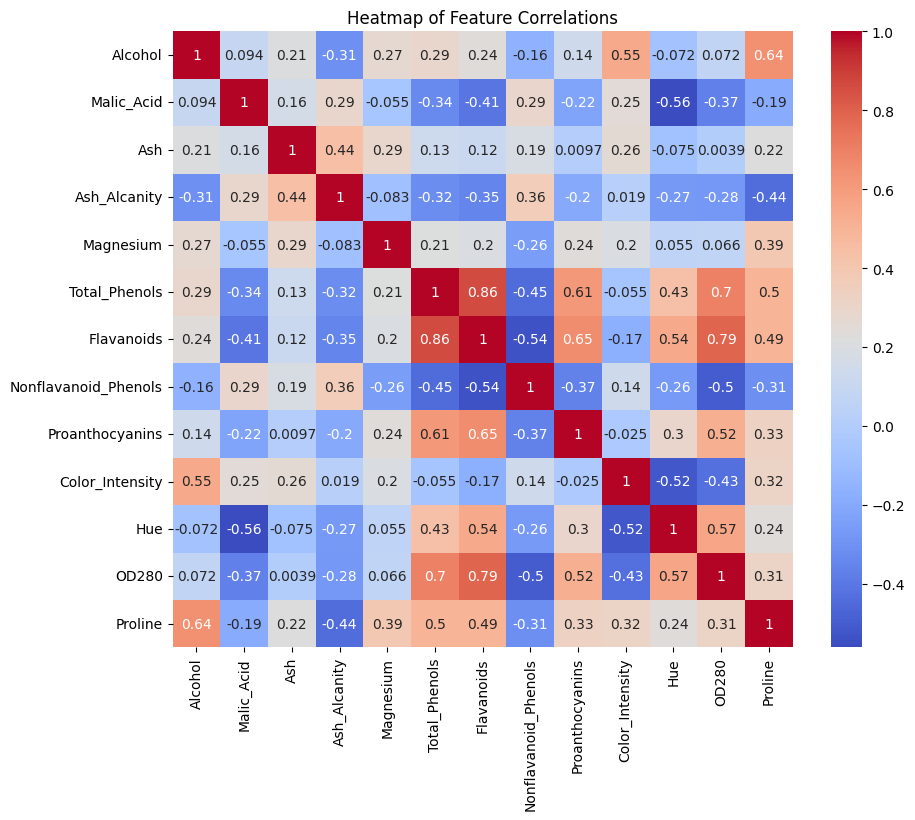

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()
